## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
tf.__version__

'2.16.1'

## Importing Dataset

In [3]:
dataset = pd.read_csv('../data/Churn_Modelling.csv')

X = dataset.iloc[:, 3:-1].values
Y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(Y)

[1 0 1 ... 1 1 0]


## Data Preprocessing

### Encoding Categorical data

##### Label Encoding 'Gender' column

In [6]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
X[:, 2] = label.fit_transform(X[:, 2])

In [7]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


##### One Hot Encoding 'Geography' column

In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting dataset into training and test set

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building ANN

### Initializing ANN

In [12]:
ann = tf.keras.models.Sequential()

### Adding Input layer and first Hidden layer

In [13]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding second Hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

### Adding output layer

In [15]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [16]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Training ANN

### Compiling ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2024-10-18 12:29:44.093903: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-18 12:29:44.093921: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-18 12:29:44.093928: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-18 12:29:44.093943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-18 12:29:44.093954: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Training ANN on training set

In [18]:
model = ann.fit(X_train, Y_train, validation_data = (X_test, Y_test), batch_size = 32, epochs = 100)

Epoch 1/100


2024-10-18 12:29:44.440243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7812 - loss: 0.5711 - val_accuracy: 0.7975 - val_loss: 0.4856
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7919 - loss: 0.4753 - val_accuracy: 0.8030 - val_loss: 0.4468
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8107 - loss: 0.4341 - val_accuracy: 0.8225 - val_loss: 0.4231
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8205 - loss: 0.4129 - val_accuracy: 0.8290 - val_loss: 0.4102
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8207 - loss: 0.4088 - val_accuracy: 0.8270 - val_loss: 0.4032
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8228 - loss: 0.4051 - val_accuracy: 0.8260 - val_loss: 0.3971
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8229 - loss: 0.3981 - val_accuracy: 0.8240 - val_loss: 0.3921
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8204 - loss: 0.3971 - val_accuracy: 0.8280

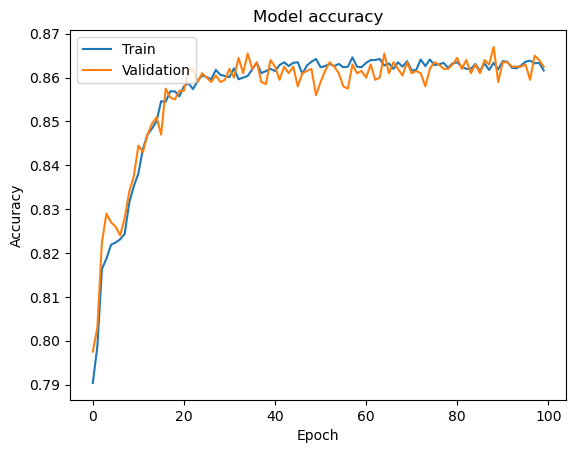

In [19]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

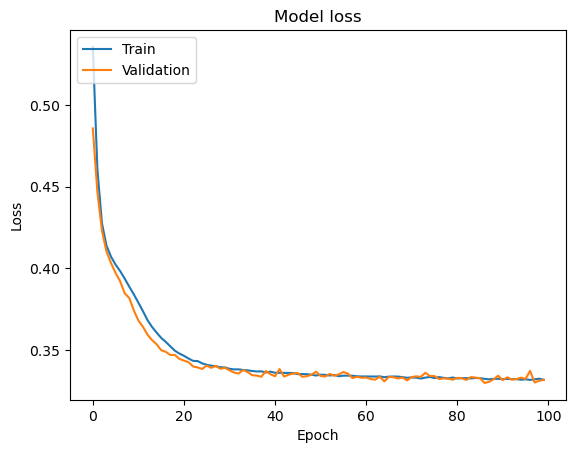

In [20]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Prediction on test set

In [21]:
Y_pred = ann.predict(X_test)
Y_pred = Y_pred > 0.5

print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(Y_test, Y_pred)
print(cm)

print(accuracy_score(Y_test, Y_pred))

[[1502   93]
 [ 182  223]]
0.8625


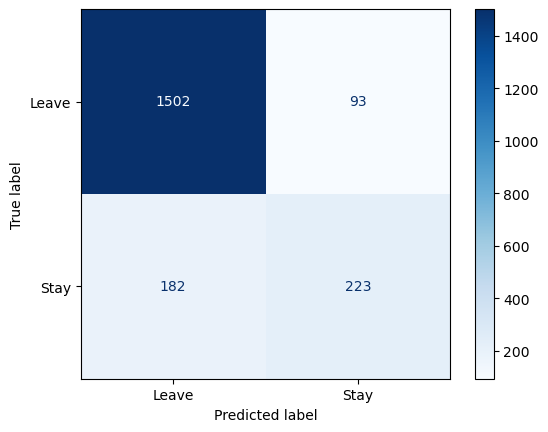

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Leave', 'Stay'])
disp.plot(cmap=plt.cm.Blues)
plt.show()


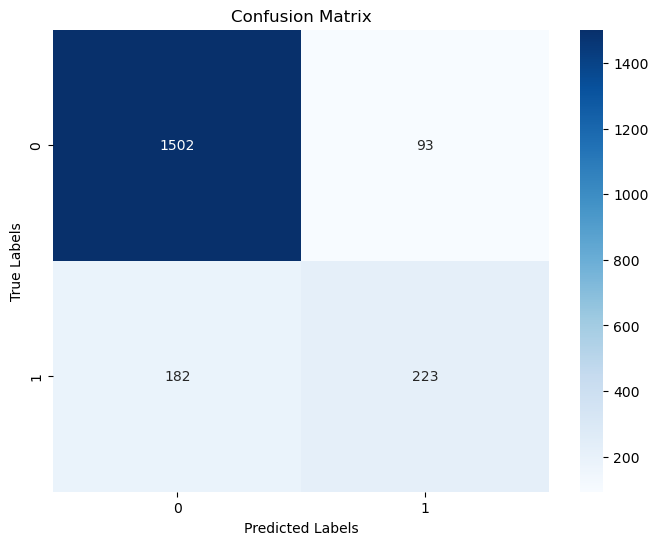

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Single Predicition

Use our ANN model to predict if the customer with the following informations will leave the bank: 

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer ?

In [25]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[False]]
